# Player Profile and Market Value: Linear Regression

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [144]:
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
df.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                4199 non-null   object 
 1   game_id_x                    4199 non-null   int64  
 2   player_id_x                  4199 non-null   int64  
 3   competition_id_x             4199 non-null   object 
 4   yellow_cards                 4199 non-null   int64  
 5   red_cards                    4199 non-null   int64  
 6   goals                        4199 non-null   int64  
 7   assists                      4199 non-null   int64  
 8   minutes_played               4199 non-null   int64  
 9   season                       4199 non-null   int64  
 10  round                        4199 non-null   object 
 11  home_club_goals              4199 non-null   int64  
 12  away_club_goals              4199 non-null   int64  
 13  home_club_position

In [148]:
df.isnull().sum()

appearance_id                  0
game_id_x                      0
player_id_x                    0
competition_id_x               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
minute                         0
type_x                         0
game_lineups_id                0
type_y                         0
number    

### Simple Linear Regression

In [151]:
import pandas as pd


def iqr_winsorization(df, thresh=1.5, columns_to_treat=['market_value_in_eur', 'highest_market_value_in_eur']):
  """
  This function treats outliers in a DataFrame using IQR and winsorization.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      thresh (float, optional): The multiplier for IQR to define outlier thresholds. Defaults to 1.5.
      columns_to_treat (list, optional): A list of column names to treat for outliers. Defaults to ['market_value_eur', 'highest_market_value_eur'].

  Returns:
      pandas.DataFrame: The DataFrame with outliers winsorized.
  """
  df_out = df.copy()  # Create a copy to avoid modifying original data

  # Check if 'columns_to_treat' are numerical
  for col in columns_to_treat:
    if not pd.api.types.is_numeric_dtype(df_out[col]):
      raise ValueError(f"Column '{col}' is not numerical. IQR winsorization only applies to numerical columns.")

  for col in columns_to_treat:
    # Calculate IQR only for numerical columns
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - thresh * IQR
    upper_fence = Q3 + thresh * IQR

    # Winsorize outliers
    df_out.loc[df_out[col] < lower_fence, col] = lower_fence
    df_out.loc[df_out[col] > upper_fence, col] = upper_fence

  return df_out

# Assuming you have your DataFrame 'df'
weather_winsorized_df = iqr_winsorization(df.copy())

# Print original and winsorized DataFrames
print("Original DataFrame:")
print(df)
print("\nDataFrame after outlier treatment for market_value_eur and highest_market_value_eur:")
print(weather_winsorized_df)

Original DataFrame:
       appearance_id  game_id_x  player_id_x competition_id_x  yellow_cards  \
0      2231426_49723    2231426        49723               L1             0   
1      2231426_49723    2231426        49723               L1             0   
2      2231426_49723    2231426        49723               L1             0   
3      2231426_49723    2231426        49723               L1             0   
4      2231426_49723    2231426        49723               L1             0   
...              ...        ...          ...              ...           ...   
4194  3415291_537467    3415291       537467              BE1             0   
4195  3415291_537467    3415291       537467              BE1             0   
4196  3415291_537467    3415291       537467              BE1             0   
4197  3415291_537467    3415291       537467              BE1             0   
4198  3415291_537467    3415291       537467              BE1             0   

      red_cards  goals  assists

In [153]:
# tells the relation between one dependent and independent variable 

In [190]:
#take the features which are influencing the market value
df_lr=df[['minutes_played','height_in_cm','highest_market_value_in_eur','assists','goals','market_value_in_eur']]
df_lr

,minutes_played,height_in_cm,highest_market_value_in_eur,assists,goals,market_value_in_eur
0,70,186,5000000,0,0,700000.0
1,70,186,5000000,0,0,700000.0
2,70,186,5000000,0,0,700000.0
3,70,186,5000000,0,0,700000.0
4,70,186,5000000,0,0,700000.0
...,...,...,...,...,...,...
4194,77,176,600000,0,1,300000.0
4195,77,176,600000,0,1,300000.0
4196,77,176,600000,0,1,300000.0
4197,77,176,600000,0,1,300000.0


### Correlation

In [158]:
#tells the linear relationship between two variables
sorted_corr=df_lr.corr()[['market_value_in_eur']].sort_values(by="market_value_in_eur",ascending=False)
sorted_corr

,market_value_in_eur
market_value_in_eur,1.000000
highest_market_value_in_eur,0.941945
assists,0.173245
goals,0.091787
minutes_played,0.077168
height_in_cm,-0.345867


### Interpretation: highest_market_value_in_eur is 0.941945: This indicates a very strong positive correlation between "market_value_in_eur" and "highest_market_value_in_eur". As it is highly correlated with market value we take this for regression model building.

In [161]:
df_linear=df[["highest_market_value_in_eur","market_value_in_eur"]]
df_linear

,highest_market_value_in_eur,market_value_in_eur
0,5000000,700000.0
1,5000000,700000.0
2,5000000,700000.0
3,5000000,700000.0
4,5000000,700000.0
...,...,...
4194,600000,300000.0
4195,600000,300000.0
4196,600000,300000.0
4197,600000,300000.0


### Scaling

In [164]:
cols = df_linear.columns
scaler = StandardScaler()
df_linear_scaled = scaler.fit_transform(df_linear)
df_scaled=pd.DataFrame(df_linear_scaled, columns=cols)
df_scaled.head()

,highest_market_value_in_eur,market_value_in_eur
0,-0.82468,-0.977711
1,-0.82468,-0.977711
2,-0.82468,-0.977711
3,-0.82468,-0.977711
4,-0.82468,-0.977711


## Market_value_in_eur Prediction (one single feature at one time in case of simple linear regression)

### 1. Market_value_in_eur Prediction using 'highest_market_value_in_eur'

#### Visualization of Data

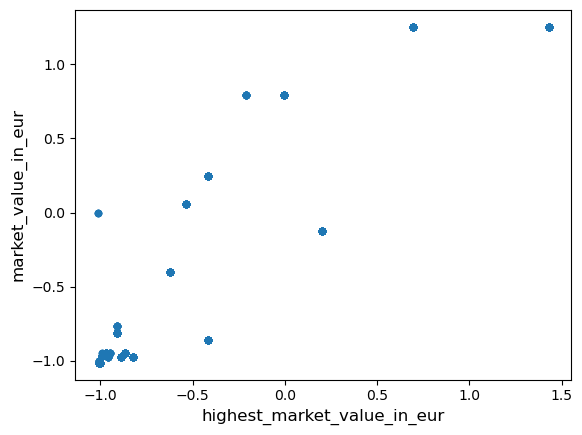

In [171]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
df_scaled.plot.scatter(x = 'highest_market_value_in_eur', y = 'market_value_in_eur', s = 20, ax=ax);
plt.show()

### Splitting : Deriving target and independent variable for data splitting

In [174]:
x=df_scaled[['highest_market_value_in_eur']]
y=df_scaled[['market_value_in_eur']]
X_gr=np.array(df_scaled['highest_market_value_in_eur']).reshape((-1, 1))
y=np.array(df_scaled['market_value_in_eur'])

X_train_gr,X_test_gr,y_train,y_test =train_test_split(X_gr,y,test_size=0.3,random_state=20)
s_model=LinearRegression().fit(X_train_gr,y_train)
s_r_sq=s_model.score(X_train_gr, y_train)
print(s_r_sq)
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

0.8859849476069753
intercept: 0.002721769703526008
slope: [0.94168289]


### Predict the model

In [177]:
y_pred = s_model.predict(X_test_gr)
print('predicted response:', y_pred, sep='\n')

predicted response:
[-0.58090981 -0.8510474  -0.9398069  ...  1.34864446 -0.38795438
 -0.00204353]


### Evaluating the model

In [180]:
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('MSE:',MSE)
print('MAE:',MAE)
print('RMSE:',RMSE)
# R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"The R2 score of the model is", r2)

MSE: 0.11050483055919728
MAE: 0.23279453765824254
RMSE: 0.33242266853991365
The R2 score of the model is 0.8901747542448888


###### MSE, MAE, and RMSE: These metrics measure the magnitude of errors between predicted and actual values. Lower values indicate better model performance. In this case, the low values suggest that the model's predictions are quite accurate.
###### R-squared: The R-squared value of 0.89 implies that 89% of the variation in the target variable can be explained by the independent variables in the model. This high value suggests a strong relationship between the predictors and the outcome.


### Predicting the new data

### Checking the linear relationship

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


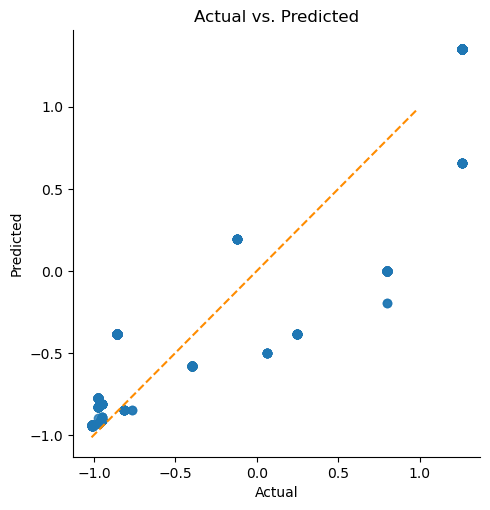

In [185]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')

    plt.title('Actual vs. Predicted')

    plt.show()

linear_assumption(s_model, X_test_gr, y_test)

#### Interpretation: Overall Trend: The points on the scatter plot show a general upward trend, suggesting a positive relationship between the actual and predicted values. This is expected in a linear regression model where an increase in the predictor variable generally leads to an increase in the predicted response.Deviation from the Diagonal Line: The points do not perfectly align with the diagonal line. This indicates that the model's predictions have some degree of error. Some points fall above the line, indicating overprediction, while others fall below, indicating underprediction.Spread of Points: The points are somewhat scattered around the diagonal line. This suggests that there's some variability in the model's predictions. Some predictions are closer to the actual values than others.

### Checking Homoscedasticity: Plot the residuals of linear regression
#### Homoscedasticity: Residuals have equal or almost equal variance across the regression line. There should not be any pattern in the error terms. It can be checked by plotting the error terms with predicted terms.

In [194]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()  

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


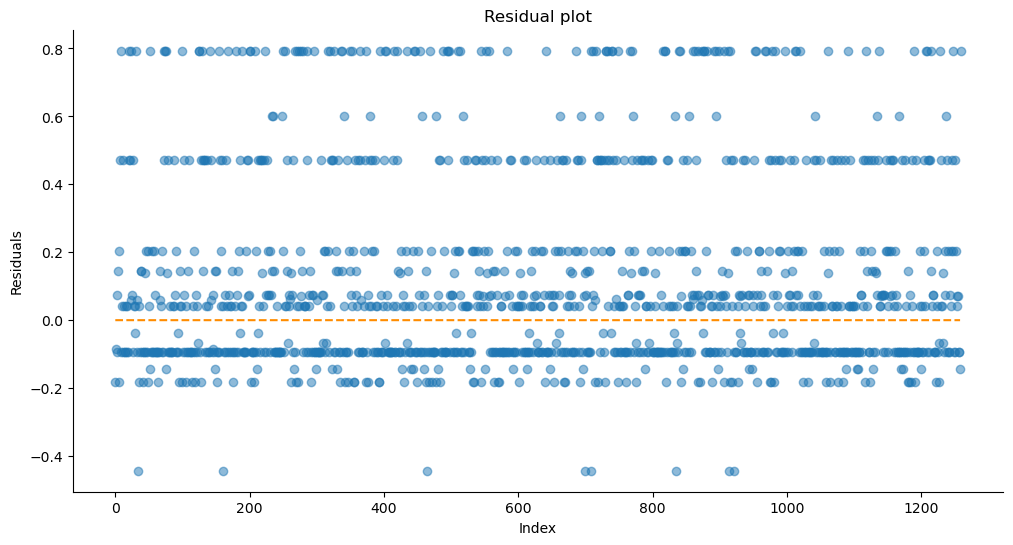

In [196]:
homoscedasticity_assumption(s_model, X_test_gr, y_test)

#### The residual plot shows a relatively random pattern around the horizontal line at zero. This is a good indication of homoscedasticity, which is one of the key assumptions of linear regression.the errors of the model are consistent throughout the range of data. 

### Error Normality curve

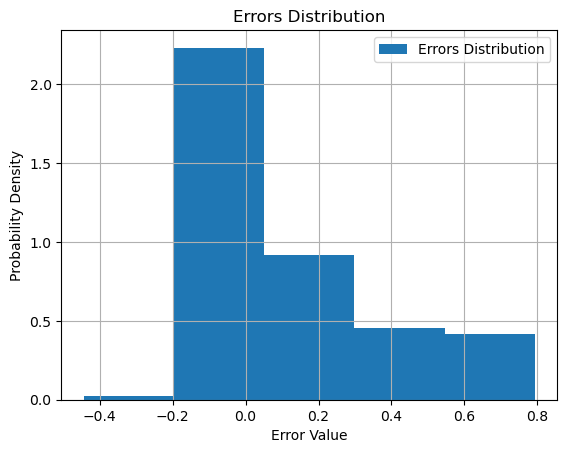

In [238]:
df_results = calculate_residuals(s_model, X_test_gr, y_test)
plt.hist(df_results.Residuals, density=True, bins=5, alpha=1, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

#### The histogram shows a distribution of the model's errors. Ideally, in linear regression, the errors should be normally distributed. While the distribution in the histogram is not perfectly symmetrical, it roughly resembles a bell shape, suggesting that the normality assumption might be reasonably met. However, there's a slight skew towards the right, indicating some asymmetry in the distribution. This suggests that the model might have a slightly higher tendency to overpredict than underpredict.

### Plot for data with Regression Line

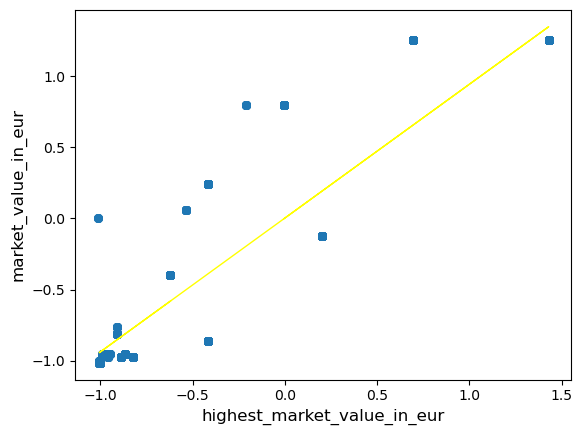

In [212]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
#plt.ylim((0,4))
#weather_df_test=X_test

df_scaled.plot.scatter(x = 'highest_market_value_in_eur', y = 'market_value_in_eur', s = 30, ax=ax)
plt.plot(X_test_gr, y_pred, color="yellow", linewidth=1)
plt.show()

#### The scatter plot illustrates a strong positive linear relationship between "highest_market_value_in_eur" and "market_value_in_eur". The regression line, a line of best fit, clearly shows this upward trend. This suggests that players with higher historical market values tend to have higher current market values. The points are relatively close to the regression line, indicating a good fit of the linear model to the data.

Strong Performance:
Low Errors:
MSE (0.1105): A very low MSE indicates that the model's predictions are generally close to the actual values.
MAE (0.2328): A low MAE suggests that the average absolute difference between predictions and actual values is small, indicating high accuracy.RMSE (0.3324): Similarly, a low RMSE suggests that the average magnitude of the errors is relatively small.

High R-squared:
R-squared (0.8902): A high R-squared value indicates that the model explains a substantial portion (89.02%) of the variability in the target variable. This suggests a strong linear relationship between the predictor and the target.
Overall:

The model demonstrates strong performance in predicting the target variable. The low error values and high R-squared value suggest that the model is accurate and provides a good fit to the data. This indicates that the predictor variable is a significant factor in explaining the variability of the target variable.

#### Multiple Linear Regression

In [313]:
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
df_mlr = df[["minutes_played","height_in_cm","highest_market_value_in_eur","goals","market_value_in_eur"]]
df_mlr

,minutes_played,height_in_cm,highest_market_value_in_eur,goals,market_value_in_eur
0,70,186,5000000,0,700000.0
1,70,186,5000000,0,700000.0
2,70,186,5000000,0,700000.0
3,70,186,5000000,0,700000.0
4,70,186,5000000,0,700000.0
...,...,...,...,...,...
4194,77,176,600000,1,300000.0
4195,77,176,600000,1,300000.0
4196,77,176,600000,1,300000.0
4197,77,176,600000,1,300000.0


### Outlier Treatment

([0, 1, 2, 3, 4],
 [Text(0, 0, 'minutes_played'),
  Text(1, 0, 'height_in_cm'),
  Text(2, 0, 'highest_market_value_in_eur'),
  Text(3, 0, 'goals'),
  Text(4, 0, 'market_value_in_eur')])

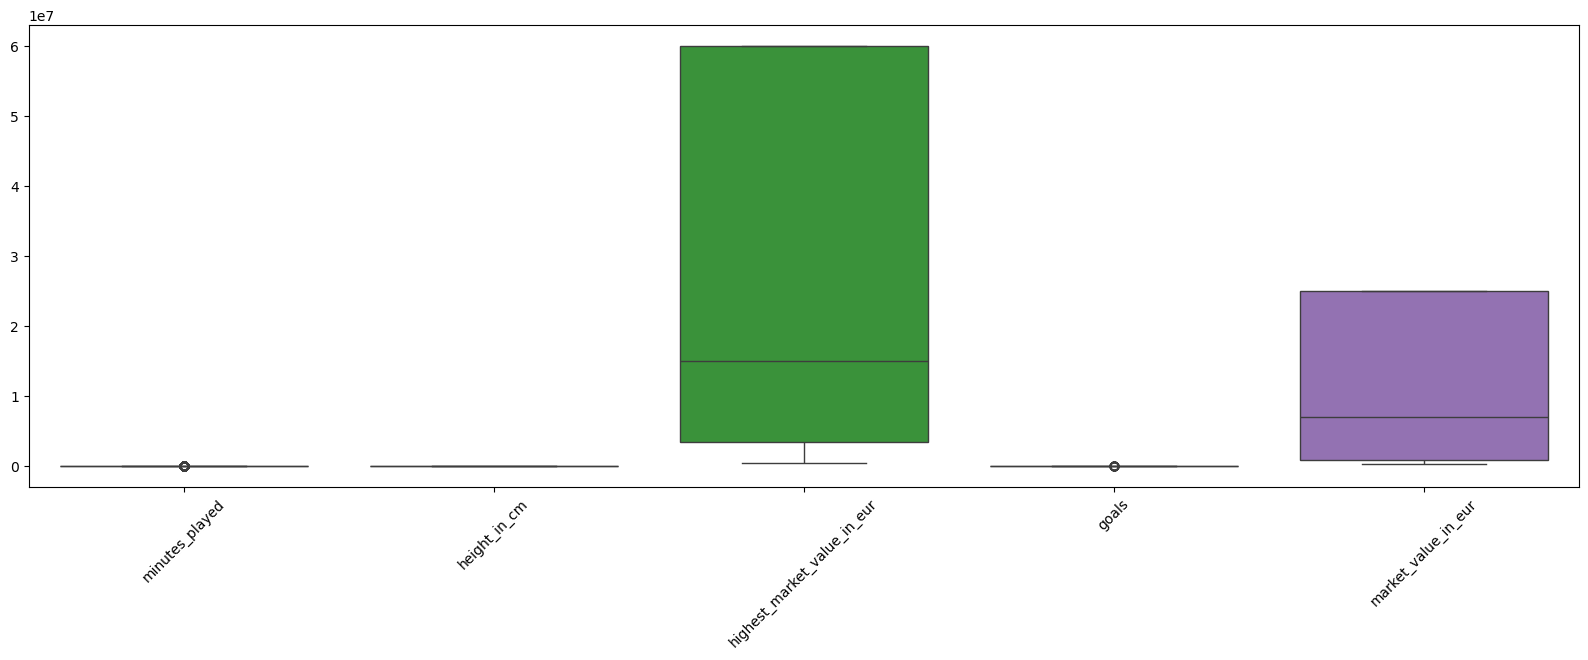

In [315]:
sns.boxplot(data=df_mlr)
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)

In [317]:
def iqr_winsorization(df, thresh=1.5):
    df_out = df.copy()  # Create a copy to avoid modifying original data
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        # Calculate IQR
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_out.loc[df_out[col] < lower_fence, col] = lower_fence
        df_out.loc[df_out[col] > upper_fence, col] = upper_fence

    return df_out

df = pd.DataFrame(df_mlr)
# Perform outlier treatment on all columns
treated_mlr_df = iqr_winsorization(df.copy())
print(treated_mlr_df )

      minutes_played  height_in_cm  highest_market_value_in_eur  goals  \
0               70.0         186.0                      5000000    0.0   
1               70.0         186.0                      5000000    0.0   
2               70.0         186.0                      5000000    0.0   
3               70.0         186.0                      5000000    0.0   
4               70.0         186.0                      5000000    0.0   
...              ...           ...                          ...    ...   
4194            77.0         176.0                       600000    1.0   
4195            77.0         176.0                       600000    1.0   
4196            77.0         176.0                       600000    1.0   
4197            77.0         176.0                       600000    1.0   
4198            77.0         176.0                       600000    1.0   

      market_value_in_eur  
0                700000.0  
1                700000.0  
2                700000.0  

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'minutes_played'),
  Text(1, 0, 'height_in_cm'),
  Text(2, 0, 'highest_market_value_in_eur'),
  Text(3, 0, 'assists'),
  Text(4, 0, 'goals'),
  Text(5, 0, 'market_value_in_eur')])

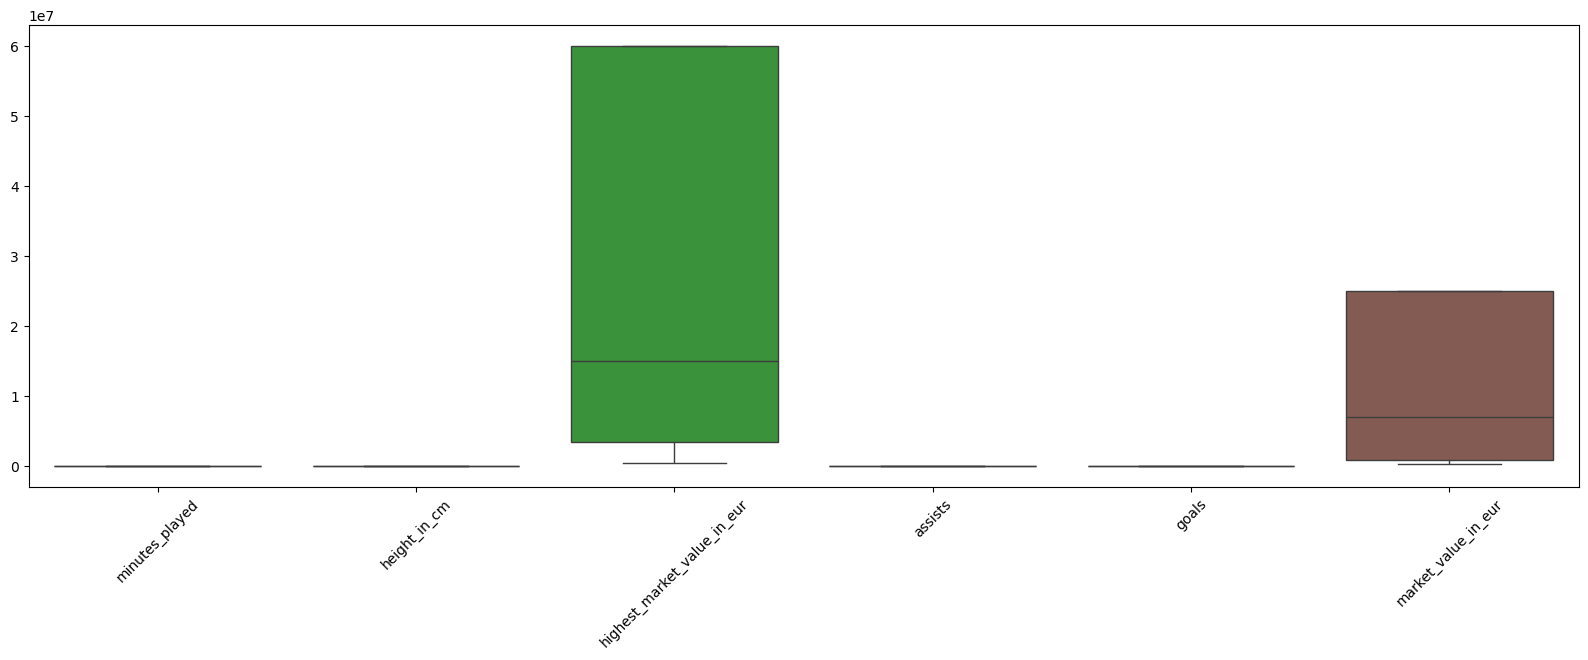

In [319]:
sns.boxplot(data=treated_multiple_df)
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)

#### Data scaling

In [322]:
cols = df_mlr.columns
scaler = StandardScaler()
df_multiple_scaled = scaler.fit_transform(treated_mlr_df)
df_multiple_scaled=pd.DataFrame(df_multiple_scaled, columns=cols)
df_multiple_scaled.head()

,minutes_played,height_in_cm,highest_market_value_in_eur,goals,market_value_in_eur
0,0.004798,0.650517,-0.82468,-0.733861,-0.977711
1,0.004798,0.650517,-0.82468,-0.733861,-0.977711
2,0.004798,0.650517,-0.82468,-0.733861,-0.977711
3,0.004798,0.650517,-0.82468,-0.733861,-0.977711
4,0.004798,0.650517,-0.82468,-0.733861,-0.977711


#### Multicolinearity

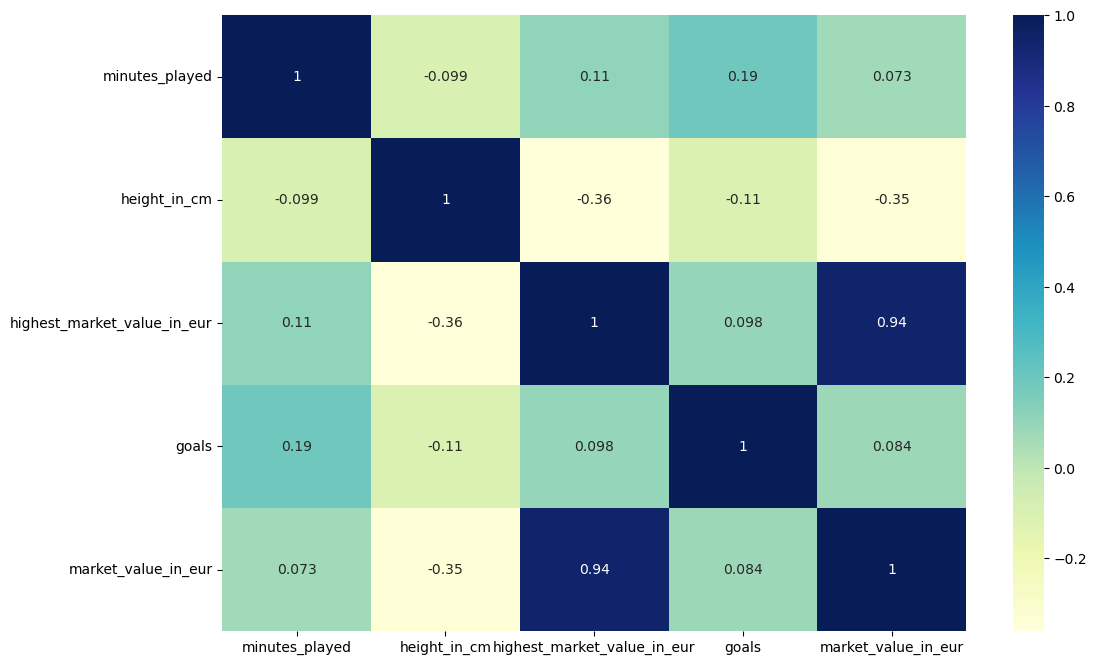

In [325]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax=sns.heatmap(df_multiple_scaled.corr(),annot=True,cmap="YlGnBu")

In [327]:
# To show the correlation values from most negatively correlated to the most positively correlated.
sorted_corr=df_multiple_scaled.corr()[['market_value_in_eur']].sort_values(by='market_value_in_eur', ascending=False)
sorted_corr

,market_value_in_eur
market_value_in_eur,1.000000
highest_market_value_in_eur,0.941945
goals,0.084043
minutes_played,0.073334
height_in_cm,-0.345867


#### 1.Feature: Highest_market_value_in_eur

In [30]:
x1 = df_multiple_scaled['highest_market_value_in_eur']
y = df_multiple_scaled['market_value_in_eur']

x1_train,x1_test,y1_train,y1_test =train_test_split(x1,y,test_size=0.3,random_state=20)
# Reshape x1_train and x1_test to 2D arrays
x1_train = x1_train.values.reshape(-1, 1)
x1_test = x1_test.values.reshape(-1, 1)
s_model1 = LinearRegression().fit(x1_train,y1_train)
s_r_sq=s_model.score(x1_train, y1_train)
print(s_r_sq)
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

0.8859849476069753
intercept: [0.00272177]
slope: [[0.94168289]]


In [34]:
y1_pred=s_model1.predict(x1_test)
print("Predicted response:",y1_pred,sep='\n')

Predicted response:
[-0.58090981 -0.8510474  -0.9398069  ...  1.34864446 -0.38795438
 -0.00204353]


In [40]:
MSE1=mean_squared_error(y1_test, y1_pred)
MAE1=mean_absolute_error(y1_test,y1_pred)
RMSE1 = mean_squared_error(y1_test, y1_pred, squared=False)
print('MSE1:',MSE1)
print('MAE1:',MAE1)
print('RMSE1:',RMSE1)
# R2 Score
from sklearn.metrics import r2_score
r2_1 = r2_score(y1_test, y1_pred)
print(f"The R2_1 score of the model is", r2_1)

MSE1: 0.11050483055919728
MAE1: 0.23279453765824254
RMSE1: 0.33242266853991365
The R2_1 score of the model is 0.8901747542448888


#### 2. Features(highest_market_value_in_eur,minutes_played) 

In [293]:
x2 = df_multiple_scaled[['highest_market_value_in_eur','minutes_played']]
y = df_multiple_scaled['market_value_in_eur']

x2_train,x2_test,y2_train,y2_test =train_test_split(x2,y,test_size=0.3,random_state=20)
# Reshape x1_train and x1_test to 2D arrays

s_model2 = LinearRegression().fit(x2_train,y2_train)
s_r_sq2=s_model2.score(x2_train, y2_train)
print(s_r_sq)
print('intercept:', s_model2.intercept_)
print('slope:', s_model2.coef_)

0.8859849476069753
intercept: 0.0029606628952831885
slope: [ 0.94519639 -0.03216589]


In [295]:
y2_pred=s_model2.predict(x2_test)
print("Predicted response:",y2_pred,sep='\n')

Predicted response:
[-0.58733707 -0.83681124 -0.86016554 ...  1.32485568 -0.41822255
 -0.03087184]


In [297]:
MSE2=mean_squared_error(y2_test, y2_pred)
MAE2=mean_absolute_error(y2_test,y2_pred)
RMSE2 = mean_squared_error(y2_test, y2_pred, squared=False)
print('MSE2:',MSE2)
print('MAE2:',MAE2)
print('RMSE2:',RMSE2)
# R2 Score
from sklearn.metrics import r2_score
r2_2 = r2_score(y2_test, y2_pred)
print(f"The R2_2 score of the model is", r2_2)

MSE2: 0.10961651154558519
MAE2: 0.22955663183630437
RMSE2: 0.33108384367949034
The R2_2 score of the model is 0.8910576102565689


#### 3. Features(highest_market_value_in_eur,assists,goals)

In [299]:
x3 = df_multiple_scaled[['highest_market_value_in_eur','minutes_played','goals']]
y = df_multiple_scaled['market_value_in_eur']

x3_train,x3_test,y3_train,y3_test =train_test_split(x3,y,test_size=0.3,random_state=20)
# Reshape x1_train and x1_test to 2D arrays

s_model3 = LinearRegression().fit(x3_train,y3_train)
s_r_sq3=s_model3.score(x3_train, y3_train)
print(s_r_sq)
print('intercept:', s_model3.intercept_)
print('slope:', s_model3.coef_)

0.8859849476069753
intercept: 0.0029587711974006
slope: [ 0.94542198 -0.03152733 -0.0032784 ]


In [301]:
y3_pred=s_model3.predict(x3_test)
print("Predicted response:",y3_pred,sep='\n')

Predicted response:
[-0.58498378 -0.83495289 -0.85963345 ...  1.32245127 -0.42104299
 -0.02789229]


In [303]:
MSE3=mean_squared_error(y3_test, y3_pred)
MAE3=mean_absolute_error(y3_test,y3_pred)
RMSE3 = mean_squared_error(y3_test, y3_pred, squared=False)
print('MSE3:',MSE3)
print('MAE3:',MAE3)
print('RMSE3:',RMSE3)
# R2 Score
from sklearn.metrics import r2_score
r2_3 = r2_score(y3_test, y3_pred)
print(f"The R2_3 score of the model is", r2_3)

MSE3: 0.10962052017564385
MAE3: 0.22961420368298435
RMSE3: 0.3310898974231075
The R2_3 score of the model is 0.8910536262788631


#### Interpretation: The r2 score of all the features is same that is 0.89

#### Homoscedasticity

In [342]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


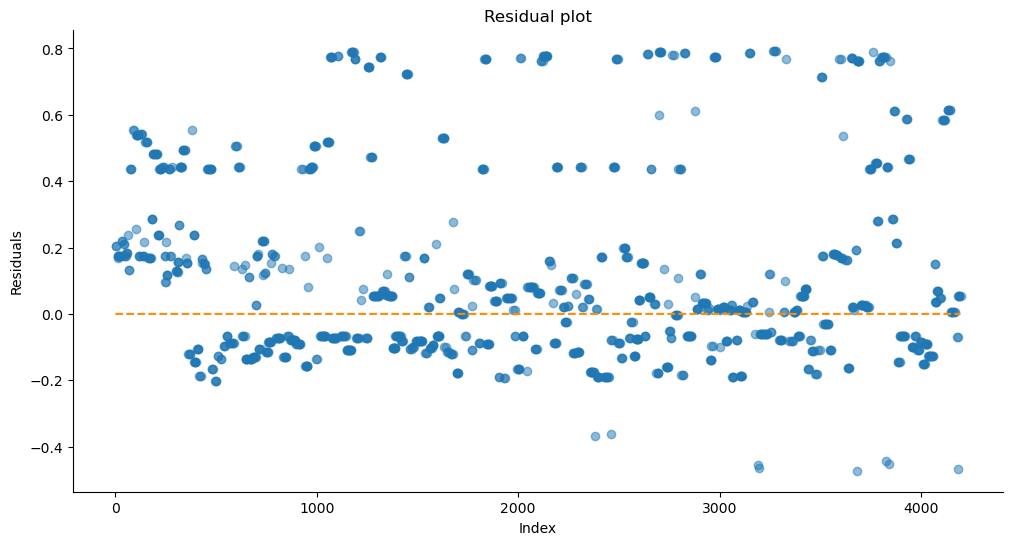

In [344]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()  
homoscedasticity_assumption(s_model3, x3_test, y3_test)

#### Interpretation:The residual plot shows a relatively random pattern of points scattered around the horizontal line at zero. This suggests that the model's errors are randomly distributed and have a relatively constant variance, which is a good indication that the assumption of homoscedasticity (equal variance of errors) is likely met. However, there might be a slight pattern towards the right side of the plot, suggesting potential heteroscedasticity that needs further investigation

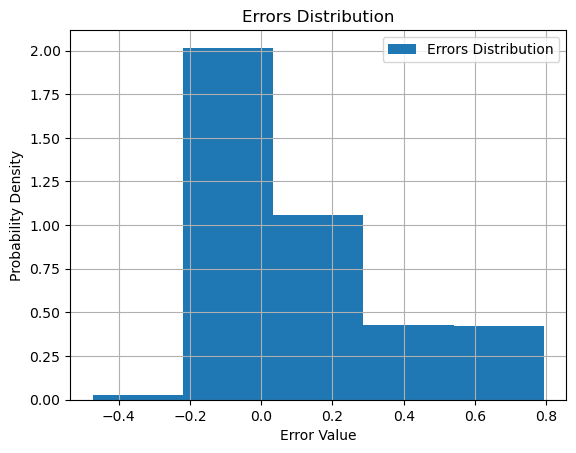

In [350]:
df_results = calculate_residuals(s_model3, x3_test, y3_test)
plt.hist(df_results.Residuals, density=True, bins=5, alpha=1, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation:Error distribution shows quite normality in nature.

0.9454219817192042


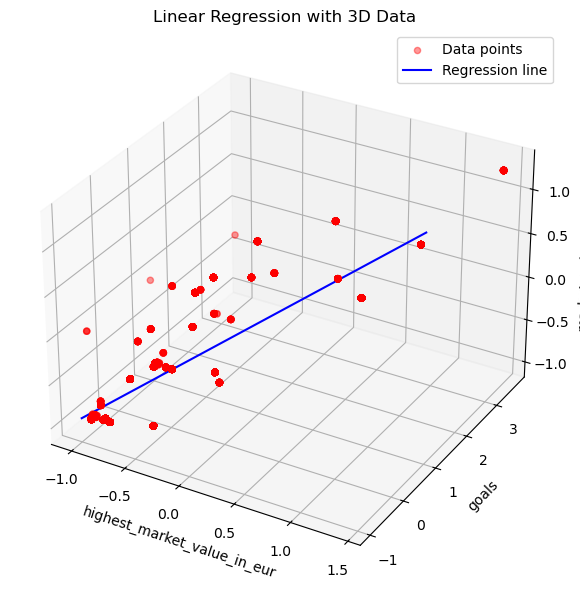

In [359]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X_2 = df_multiple_scaled[['highest_market_value_in_eur', 'goals']].values.reshape(-1,2)
Y = df_multiple_scaled['market_value_in_eur']

x = X_2[:, 0]
y = X_2[:, 1]
z = Y

# Generate data for regression line
x1_line = np.arange(min(x), max(x), 0.1)
#x2_line = np.arange(min(y), max(y),0.1)
x2_line = np.array([s_model3.coef_[0] * val + (s_model3.intercept_ + s_model3.coef_[1] * np.mean(y)) for val in x1_line])
y_line = s_model3.coef_[0] * x1_line + s_model3.coef_[1] * x2_line + s_model3.intercept_

print(s_model3.coef_[0])
#print(x1_line) #global radiation
#print(x2_line)
# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(x, y, z, c='red', marker='o', alpha=0.4, label='Data points')

# Plot regression line
ax.plot(x1_line, x2_line, y_line, c='b', label='Regression line')

# Set labels and title
ax.set_xlabel('highest_market_value_in_eur')
ax.set_ylabel('goals')
ax.set_zlabel('market_value_in_eur')
ax.set_title('Linear Regression with 3D Data')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

#### The scatter plot visualizes a positive linear relationship between the highest market value and assists with the dependent variable. The regression line, representing the best-fit line, suggests that as the values of these independent variables increase, the dependent variable also tends to increase. However, the scatter of the data points indicates that other factors might also influence the dependent variable.

#### Overall Interpretation: Both for linear and multiple regression the r2 score is same. We can consider both models.